<a href="https://colab.research.google.com/github/lleiva25/Project4/blob/main/Part2_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#Install libraries
!pip install tf-explain

In [34]:
#Import Dependencies
#Inception
from keras.applications import InceptionV3
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_v3 import preprocess_input
import pandas as pd
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import os
import glob
import re

#Xception
import numpy as np
import tensorflow as tf
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import (Xception,
                                                    preprocess_input,
                                                    decode_predictions)
import requests

#MobileNetV3
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report


#Sequential
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.layers import BatchNormalization
from tqdm import tqdm
from PIL import Image
import os
from sklearn.metrics import precision_score, recall_score

# Comparison of Pretrained Models (Leslie Leiva)

<h1> Inception </h1>

In [35]:
#Specifiy file types for glob to collect paths from
types=('*.jpg','*.jpeg','*.png')

#List of images glob found
image_files = []

#Loop through files in directory and obtain only specific image types
for files in types:
    image_files.extend(glob.glob(f'/content/drive/MyDrive/Training Images/{files}'))

#Sort list in ascending order
image_files.sort()

#Create a list of california produce and empty lists to store values
california_produce = ['almond','dairy','grapes','lettuce','rice','strawberry']
almond = []
dairy = []
grapes = []
lettuce = []
rice = []
strawberry = []

#Loop through images to store image paths to the specific produce
for image in image_files:
    for produce in california_produce:
        if re.search(produce, image, flags=re.IGNORECASE):
            if produce == "almond":
                almond.append(image)
                almond.sort()
            elif produce == "dairy":
                dairy.append(image)
                dairy.sort()
            elif produce == "grapes":
                grapes.append(image)
                grapes.sort()
            elif produce == "lettuce":
                lettuce.append(image)
                lettuce
            elif produce == "rice":
                rice.append(image)
                rice.sort()
            elif produce == "strawberry":
                strawberry.append(image)
                strawberry.sort()

#Loop for running all images in list into machine
for image in almond:
    img = load_img(f'{image}')
    img = img.resize((299,299))
    #convert the image to array
    img_array = img_to_array(img)

    #convert the image into a 4 dimensional Tensor
    #convert from (height, width, channels), (batchsize, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    #preprocess the input image array
    img_array = preprocess_input(img_array)

    #Load the model from internet / computer
    #approximately 96 MB
    pretrained_model = InceptionV3(weights="imagenet")

    #predict using predict() method
    prediction = pretrained_model.predict(img_array)
    #decode the prediction
    actual_prediction = imagenet_utils.decode_predictions(prediction)

    #output_df =

    print("predicted object is:")
    print(actual_prediction[0][0][1])
    print("with accuracy")
    print(actual_prediction[0][0][2]*100)
    print('-'*100)

    #display image and the prediction text over it
    disp_img = cv2.imread(image)
    #display prediction text over the image
    cv2.putText(disp_img, actual_prediction[0][0][1], (20,20), cv2.FONT_HERSHEY_TRIPLEX , 0.8, (255,255,255))

1/1 [==============================] - 9s 9s/step
predicted object is:
coil
with accuracy
31.50324821472168
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 6s 6s/step
predicted object is:
strawberry
with accuracy
72.36565351486206
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 4s 4s/step
predicted object is:
mortar
with accuracy
12.602163851261139
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
cucumber
with accuracy
33.47498178482056
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
corn
with accuracy
20.10928988456726
-------------------------------------------

In [36]:
#Loop for running all images in list into machine
for image in dairy:
    img = load_img(f'{image}')
    img = img.resize((299,299))
    #convert the image to array
    img_array = img_to_array(img)

    #convert the image into a 4 dimensional Tensor
    #convert from (height, width, channels), (batchsize, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    #preprocess the input image array
    img_array = preprocess_input(img_array)

    #Load the model from internet / computer
    #approximately 96 MB
    pretrained_model = InceptionV3(weights="imagenet")

    #predict using predict() method
    prediction = pretrained_model.predict(img_array)
    #decode the prediction
    actual_prediction = imagenet_utils.decode_predictions(prediction)

    #output_df =

    print("predicted object is:")
    print(actual_prediction[0][0][1])
    print("with accuracy")
    print(actual_prediction[0][0][2]*100)
    print('-'*100)

    #display image and the prediction text over it
    disp_img = cv2.imread(image)
    #display prediction text over the image
    cv2.putText(disp_img, actual_prediction[0][0][1], (20,20), cv2.FONT_HERSHEY_TRIPLEX , 0.8, (255,255,255))

1/1 [==============================] - 2s 2s/step
predicted object is:
eggnog
with accuracy
76.15361213684082
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
water_jug
with accuracy
41.925668716430664
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
eggnog
with accuracy
20.24654448032379
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
lab_coat
with accuracy
75.28907656669617
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
eggnog
with accuracy
92.52989888191223
----------------------------------------

In [37]:
#Loop for running all images in list into machine
for image in grapes:
    img = load_img(f'{image}')
    img = img.resize((299,299))
    #convert the image to array
    img_array = img_to_array(img)

    #convert the image into a 4 dimensional Tensor
    #convert from (height, width, channels), (batchsize, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    #preprocess the input image array
    img_array = preprocess_input(img_array)

    #Load the model from internet / computer
    #approximately 96 MB
    pretrained_model = InceptionV3(weights="imagenet")

    #predict using predict() method
    prediction = pretrained_model.predict(img_array)
    #decode the prediction
    actual_prediction = imagenet_utils.decode_predictions(prediction)

    #output_df =

    print("predicted object is:")
    print(actual_prediction[0][0][1])
    print("with accuracy")
    print(actual_prediction[0][0][2]*100)
    print('-'*100)

    #display image and the prediction text over it
    disp_img = cv2.imread(image)
    #display prediction text over the image
    cv2.putText(disp_img, actual_prediction[0][0][1], (20,20), cv2.FONT_HERSHEY_TRIPLEX , 0.8, (255,255,255))

1/1 [==============================] - 2s 2s/step
predicted object is:
fig
with accuracy
36.32708489894867
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
fig
with accuracy
20.795680582523346
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
corn
with accuracy
38.569217920303345
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 3s 3s/step
predicted object is:
broccoli
with accuracy
47.16639816761017
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
corn
with accuracy
54.17526960372925
----------------------------------------------------

In [38]:
#Loop for running all images in list into machine
for image in lettuce:
    img = load_img(f'{image}')
    img = img.resize((299,299))
    #convert the image to array
    img_array = img_to_array(img)

    #convert the image into a 4 dimensional Tensor
    #convert from (height, width, channels), (batchsize, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    #preprocess the input image array
    img_array = preprocess_input(img_array)

    #Load the model from internet / computer
    #approximately 96 MB
    pretrained_model = InceptionV3(weights="imagenet")

    #predict using predict() method
    prediction = pretrained_model.predict(img_array)
    #decode the prediction
    actual_prediction = imagenet_utils.decode_predictions(prediction)

    #output_df =

    print("predicted object is:")
    print(actual_prediction[0][0][1])
    print("with accuracy")
    print(actual_prediction[0][0][2]*100)
    print('-'*100)

    #display image and the prediction text over it
    disp_img = cv2.imread(image)
    #display prediction text over the image
    cv2.putText(disp_img, actual_prediction[0][0][1], (20,20), cv2.FONT_HERSHEY_TRIPLEX , 0.8, (255,255,255))

1/1 [==============================] - 3s 3s/step
predicted object is:
head_cabbage
with accuracy
95.85044980049133
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
head_cabbage
with accuracy
93.57073307037354
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 3s 3s/step
predicted object is:
head_cabbage
with accuracy
85.3359043598175
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 4s 4s/step
predicted object is:
broccoli
with accuracy
54.83118295669556
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
head_cabbage
with accuracy
87.18487620353699
---------------------

In [39]:
#Loop for running all images in list into machine
for image in rice:
    img = load_img(f'{image}')
    img = img.resize((299,299))
    #convert the image to array
    img_array = img_to_array(img)

    #convert the image into a 4 dimensional Tensor
    #convert from (height, width, channels), (batchsize, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    #preprocess the input image array
    img_array = preprocess_input(img_array)

    #Load the model from internet / computer
    #approximately 96 MB
    pretrained_model = InceptionV3(weights="imagenet")

    #predict using predict() method
    prediction = pretrained_model.predict(img_array)
    #decode the prediction
    actual_prediction = imagenet_utils.decode_predictions(prediction)

    #output_df =

    print("predicted object is:")
    print(actual_prediction[0][0][1])
    print("with accuracy")
    print(actual_prediction[0][0][2]*100)
    print('-'*100)

    #display image and the prediction text over it
    disp_img = cv2.imread(image)
    #display prediction text over the image
    cv2.putText(disp_img, actual_prediction[0][0][1], (20,20), cv2.FONT_HERSHEY_TRIPLEX , 0.8, (255,255,255))

1/1 [==============================] - 2s 2s/step
predicted object is:
mashed_potato
with accuracy
90.66335558891296
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
wooden_spoon
with accuracy
22.116802632808685
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
mashed_potato
with accuracy
43.6080127954483
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
starfish
with accuracy
22.550585865974426
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 3s 3s/step
predicted object is:
corn
with accuracy
23.712119460105896
------------------------

In [40]:
#Loop for running all images in list into machine
for image in strawberry:
    img = load_img(f'{image}')
    img = img.resize((299,299))
    #convert the image to array
    img_array = img_to_array(img)

    #convert the image into a 4 dimensional Tensor
    #convert from (height, width, channels), (batchsize, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    #preprocess the input image array
    img_array = preprocess_input(img_array)

    #Load the model from internet / computer
    #approximately 96 MB
    pretrained_model = InceptionV3(weights="imagenet")

    #predict using predict() method
    prediction = pretrained_model.predict(img_array)
    #decode the prediction
    actual_prediction = imagenet_utils.decode_predictions(prediction)

    #output_df =

    print("predicted object is:")
    print(actual_prediction[0][0][1])
    print("with accuracy")
    print(actual_prediction[0][0][2]*100)
    print('-'*100)

    #display image and the prediction text over it
    disp_img = cv2.imread(image)
    #display prediction text over the image
    cv2.putText(disp_img, actual_prediction[0][0][1], (20,20), cv2.FONT_HERSHEY_TRIPLEX , 0.8, (255,255,255))

1/1 [==============================] - 2s 2s/step
predicted object is:
strawberry
with accuracy
96.389240026474
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
strawberry
with accuracy
99.57738518714905
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
strawberry
with accuracy
77.18230485916138
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
strawberry
with accuracy
98.72167706489563
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 2s 2s/step
predicted object is:
strawberry
with accuracy
90.31966924667358
----------------------------

<h1>Xception </h1>

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x7a4de2a79630>>
1/1 [==============================] - 2s 2s/step
/content/drive/MyDrive/Training Images/almond0.jpg
[[('n04597913', 'wooden_spoon', 0.35889885), ('n03065424', 'coil', 0.10226495), ('n03775546', 'mixing_bowl', 0.07511136), ('n07930864', 'cup', 0.058111377), ('n03627232', 'knot', 0.043761414)]]
1/1 [==============================] - 0s 389ms/step
/content/drive/MyDrive/Training Images/almond1.jpg
[[('n07745940', 'strawberry', 0.98371994), ('n01985128', 'crayfish', 0.002670907), ('n07613480', 'trifle', 0.0018146428), ('n12620546', 'hip', 0.0011499737), ('n07836838', 'chocolate_sauce', 0.0005707261)]]
1/1 [==============================] - 0s 384ms/step
/content/drive/MyDrive/Training Images/almond2.jpeg
[[('n04599235', 'wool', 0.29920307), ('n03314780', 'face_powder', 0.28431013), ('n03786901', 'mortar', 0.029343653), ('n03937543', 'pill_bottle', 0.020916365), ('n03223299', 'doormat', 0.0163

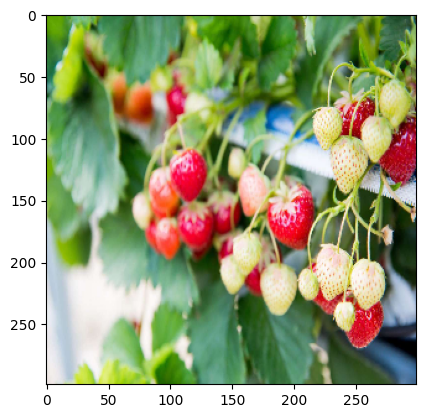

In [41]:
#load pre trained Xception model
model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=True)
#Summary of Xception Model
print(model.summary)


#loading and preprocessing Rice image
IMAGE_PATH='/content/drive/MyDrive/Training Images/'

for image in almond:
  #Loading image into machine
  img=tf.keras.preprocessing.image.load_img(image,target_size=(299,299))
  img=tf.keras.preprocessing.image.img_to_array(img)

  #view the image
  plt.imshow(img/255.)

  #fetching labels from Imagenet
  response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
  imgnet_map=response.json()
  imgnet_map={v[1]:k for k, v in imgnet_map.items()}

  #make model predictions
  img=tf.keras.applications.xception.preprocess_input(img)
  predictions=model.predict(np.array([img]))
  print(image)
  actual_prediction6 = imagenet_utils.decode_predictions(predictions)
  print(actual_prediction6)
  decode_predictions(predictions,top=5)

for image in dairy:
  #Loading image into machine
  img=tf.keras.preprocessing.image.load_img(image,target_size=(299,299))
  img=tf.keras.preprocessing.image.img_to_array(img)

  #view the image
  plt.imshow(img/255.)

  #fetching labels from Imagenet
  response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
  imgnet_map=response.json()
  imgnet_map={v[1]:k for k, v in imgnet_map.items()}

  #make model predictions
  img=tf.keras.applications.xception.preprocess_input(img)
  predictions=model.predict(np.array([img]))
  print(image)
  actual_prediction5 = imagenet_utils.decode_predictions(prediction)
  print(actual_prediction5)
  decode_predictions(predictions,top=5)

for image in grapes:
  #Loading image into machine
  img=tf.keras.preprocessing.image.load_img(image,target_size=(299,299))
  img=tf.keras.preprocessing.image.img_to_array(img)

  #view the image
  plt.imshow(img/255.)

  #fetching labels from Imagenet
  response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
  imgnet_map=response.json()
  imgnet_map={v[1]:k for k, v in imgnet_map.items()}

  #make model predictions
  img=tf.keras.applications.xception.preprocess_input(img)
  predictions=model.predict(np.array([img]))
  print(image)
  actual_prediction4 = imagenet_utils.decode_predictions(predictions)
  print(actual_prediction4)
  decode_predictions(predictions,top=5)

for image in lettuce:
  #Loading image into machine
  img=tf.keras.preprocessing.image.load_img(image,target_size=(299,299))
  img=tf.keras.preprocessing.image.img_to_array(img)

  #view the image
  plt.imshow(img/255.)

  #fetching labels from Imagenet
  response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
  imgnet_map=response.json()
  imgnet_map={v[1]:k for k, v in imgnet_map.items()}

  #make model predictions
  img=tf.keras.applications.xception.preprocess_input(img)
  predictions=model.predict(np.array([img]))
  print(image)
  actual_prediction3 = imagenet_utils.decode_predictions(predictions)
  print(actual_prediction3)
  decode_predictions(predictions,top=5)

for image in rice:
  #Loading image into machine
  img=tf.keras.preprocessing.image.load_img(image,target_size=(299,299))
  img=tf.keras.preprocessing.image.img_to_array(img)

  #view the image
  plt.imshow(img/255.)

  #fetching labels from Imagenet
  response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
  imgnet_map=response.json()
  imgnet_map={v[1]:k for k, v in imgnet_map.items()}

  #make model predictions
  img=tf.keras.applications.xception.preprocess_input(img)
  predictions=model.predict(np.array([img]))
  print(image)
  actual_prediction2 = imagenet_utils.decode_predictions(predictions)
  print(actual_prediction2)
  decode_predictions(predictions,top=5)

for image in strawberry:
  #Loading image into machine
  img=tf.keras.preprocessing.image.load_img(image,target_size=(299,299))
  img=tf.keras.preprocessing.image.img_to_array(img)

  #view the image
  plt.imshow(img/255.)

  #fetching labels from Imagenet
  response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
  imgnet_map=response.json()
  imgnet_map={v[1]:k for k, v in imgnet_map.items()}

  #make model predictions
  img=tf.keras.applications.xception.preprocess_input(img)
  predictions=model.predict(np.array([img]))
  print(image)
  actual_prediction1 = imagenet_utils.decode_predictions(predictions)
  print(actual_prediction1)
  decode_predictions(predictions,top=5)

<h1>Plotting Comparison (Leslie Leiva)</h1>

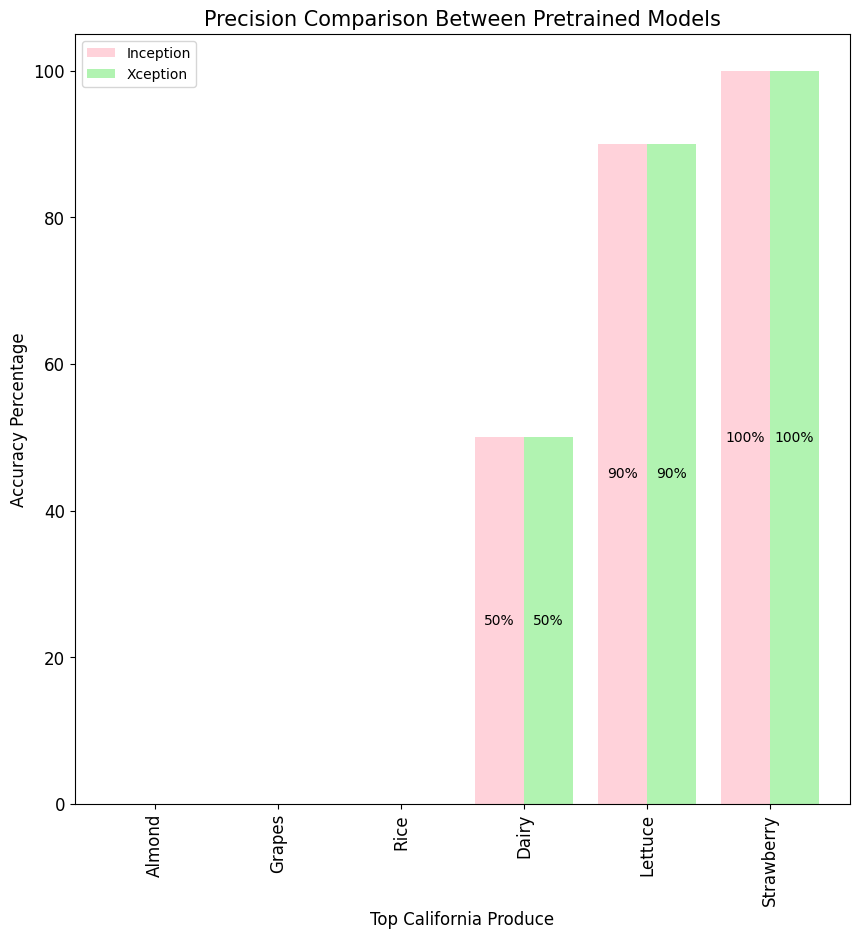

In [42]:
url = 'https://docs.google.com/spreadsheets/d/12uetZGWujfeW3XR7THZ0swjWhSzWLE_ITbCQPU77kfE/edit#gid=0'

produce_list = ['Strawberry',
                'Dairy',
                'Almond',
                'Grapes',
                'Lettuce',
                'Rice']
inception_accuracy_list = [89.6,56.7,28.9,37.3,67.6,33.4]
xception_accuracy_list = [84.9,35,44.6,23,65.3,38.9]

inception_precision_list = [100,50,0,0,90,0]
xception_precision_list = [100,50,0,0,90,0]
inception_df = pd.DataFrame(
    {'Produce': produce_list,
    'Accuracy': inception_accuracy_list,
    'Precision': inception_precision_list}
)
xception_df = pd.DataFrame({
    'Produce': produce_list,
    'Accuracy': xception_accuracy_list,
    'Precision': xception_precision_list
})

df = pd.DataFrame(
    {'Produce': produce_list,
    'Inception Accuracy': inception_accuracy_list,
    'Xception Accuracy': xception_accuracy_list}
)

df1 = pd.DataFrame(
    {'Produce': produce_list,
    'Inception Precision': inception_precision_list,
    'Xception Precision': xception_precision_list}
)


inception_df.set_index('Produce', inplace=True)
xception_df.set_index('Produce', inplace=True)
df.set_index('Produce', inplace=True)
df1.set_index('Produce', inplace=True)


ax = df1.sort_values(by='Inception Precision').plot(kind='bar',color=['pink', 'lightgreen'],
                                                  align='center',figsize=(10,10),width=0.8,
                                                  fontsize=12, alpha=0.7)
#ax.set_facecolor(alpha=1

#Title graph
plt.title(f"Precision Comparison Between Pretrained Models",fontsize=15)

#Removing the Legend
ax.legend(labels = ['Inception','Xception'])

#Labeling x y axis
ax.set_ylabel('Accuracy Percentage',fontsize=12)
ax.set_xlabel('Top California Produce',fontsize=12)

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}%' if x>0 else'', label_type='center',fontsize=10)

plt.savefig("PrecisionPreTrained.png",bbox_inches='tight',dpi=100,transparent=True)

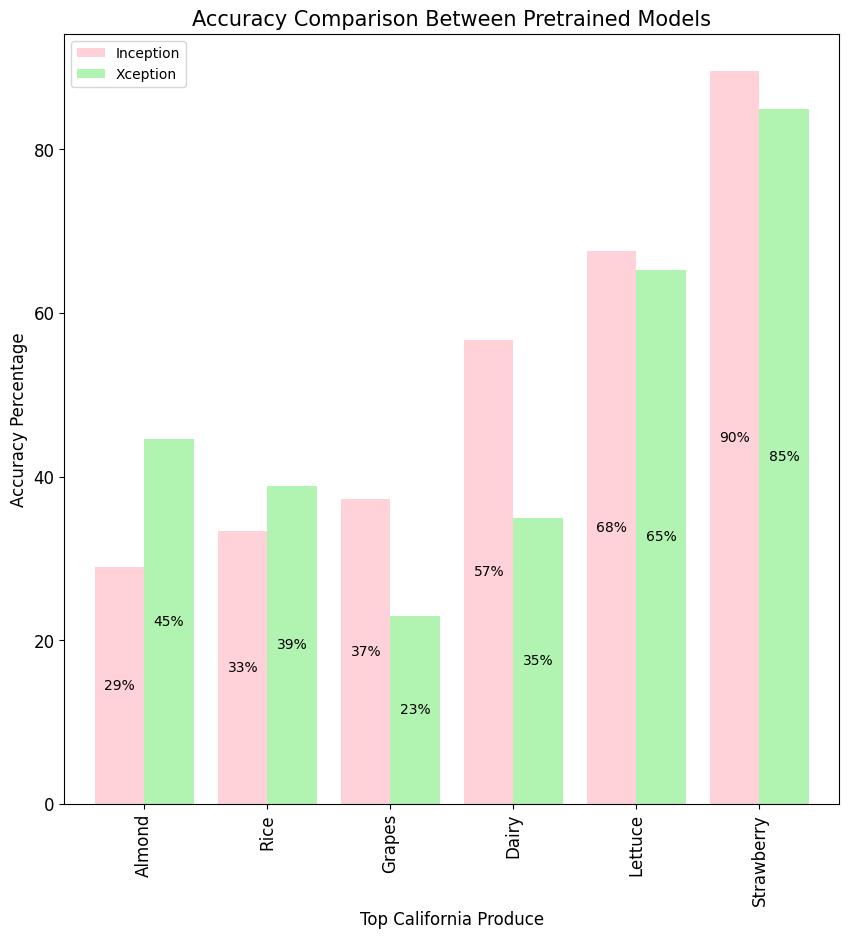

In [43]:

ax = df.sort_values(by='Inception Accuracy').plot(kind='bar',color=['pink', 'lightgreen'],
                                                  align='center',figsize=(10,10),width=0.8,
                                                  fontsize=12, alpha=0.7)
#ax.set_facecolor(alpha=1)
#Title graph
plt.title(f"Accuracy Comparison Between Pretrained Models",fontsize=15)

#Removing the Legend
ax.legend(labels = ['Inception','Xception'])

#Labeling x y axis
ax.set_ylabel('Accuracy Percentage',fontsize=12)
ax.set_xlabel('Top California Produce',fontsize=12)

#Labeling the bars in the graph
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0f}%' if x>0 else'', label_type='center',fontsize=10)

plt.savefig("AccuracyPreTrained.png",bbox_inches='tight',dpi=100,transparent=True)


# Looking into more Efficient Models

<h1>Trained Model (Kevin Tian) </h1>

In [28]:
#Image directory
image_dir = Path('/content/drive/MyDrive/Training Images')

#Finding image files
filepaths = list(image_dir.glob(r'**/*.jpg'))

#Create df from files
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(truelabels, name='Label')
images = pd.concat([filepaths, labels], axis=1)

category_samples = []
for category in images['Label'].unique():
    category_slice = images.query("Label == @category")
    category_samples.append(category_slice.sample(36, random_state=1))
image_df = pd.concat(category_samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

image_df['Label'].value_counts()

train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)


train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)


#print(model.summary())

results = model.evaluate(test_images, verbose=0)
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

predictions = np.argmax(model.predict(test_images), axis=1)

cm = confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)

plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(6) + 0.5, labels=test_images.class_indices, rotation=90)
plt.yticks(ticks=np.arange(6) + 0.5, labels=test_images.class_indices, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

AttributeError: 'str' object has no attribute 'glob'

In [ ]:
print("Classification Report:\n----------------------\n", clr)

<h1>PreTrained Model (Kimberley Toro)</h1>

In [ ]:
#import directory
image_directory='../MultiLabel_Project4_Test /P4_MultiLabel_Images'

#Read dataframe
df = pd.read_csv('../MultiLabel_Project4_Test /Project_4_MultiLabel_Test.csv')

# List files in the image directory
image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Create an empty list to store resized images
resized_images = []

# Define the target size to which you want to resize your images
target_size = (200, 200)  # Specify your desired width and height

# Loop through each image file and resize
for img_name in tqdm(image_files):  # Use tqdm to track progress
    # Open the image using PIL
    img_path = os.path.join(image_directory, img_name)
    img_pil = Image.open(img_path)

    # Resize the image
    resized_img = img_pil.resize(target_size)

    # Convert the resized image to numpy array
    resized_img_array = np.array(resized_img)

    # Append the resized image to the list
    resized_images.append(resized_img_array)

# Convert the resized images list to numpy array
resized_images = np.array(resized_images)
resized_images_with_batch = np.expand_dims(resized_images, axis=0)

# Assign resized_images to X
X = resized_images
#Drop 'ID' and 'Img_Label'
y = np.array(df.drop(['ID','Img_Label'], axis=1))  # Extract labels from DataFrame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Make predictions using y_pred
y_pred = model.predict(X_test)

# Calculate MicroPrecision and MicroRecall
y_true = np.argmax(y_test, axis=1)
micro_precision = precision_score(y_true, np.argmax(y_pred, axis=1), average='micro')
micro_recall = recall_score(y_true, np.argmax(y_pred, axis=1), average='micro')

print("MicroPrecision:", micro_precision)
print("MicroRecall:", micro_recall)

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(13, activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

# Check the shape of input features (X_train, X_test)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Check the shape of target labels (y_train, y_test)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']  # Use 'accuracy' instead of 'acc'
val_acc = history.history['val_accuracy']  # Use 'val_accuracy' instead of 'val_acc'

# Get the number of epochs
epochs = range(1, len(acc) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Validate on an image

img = image.load_img('../MultiLabel_Project4_Test /P4_MultiLabel_Images/70.jpg', target_size=(200,200,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories, modified to 3

#Print classes and corresponding probabilities
for i in range(10):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))


_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


In [ ]:

img = image.load_img('../MultiLabel_Project4_Test /P4_MultiLabel_Images/3.jpg', target_size=(200,200,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-14:-1]  #Get class names for top 10 categories, modified to 3

#Print classes and corresponding probabilities
for i in range(13):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


In [ ]:

img = image.load_img('../MultiLabel_Project4_Test /P4_MultiLabel_Images/116.jpg', target_size=(200,200,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-14:-1]  #Get class names for top 10 categories, modified to 3

#Print classes and corresponding probabilities
for i in range(13):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

In [ ]:
img = image.load_img('../MultiLabel_Project4_Test /P4_MultiLabel_Images/95.jpg', target_size=(200,200,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-14:-1]  #Get class names for top 10 categories, modified to 3

#Print classes and corresponding probabilities
for i in range(13):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

    _, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")